In [1]:
import midi
import numpy as np

In [2]:
SEGMENT_LENGTH = 128
DIVISION_LENGTH = 16

LOWER_BOUND = 24
UPPER_BOUND = 102

MIDI_FILE_EXTENSION = '.mid'

In [3]:
def get_piece(midi_file):
    pattern = midi.read_midifile(midi_file)

    remaining_time = [track[0].tick for track in pattern]

    positions = [0 for _ in pattern]

    time = 0
    span = UPPER_BOUND - LOWER_BOUND

    state_matrix = []
    state = [[0, 0] for _ in xrange(span)]
    state_matrix.append(state)

    while True:
        if time % (pattern.resolution / 4) == (pattern.resolution / 8):
            # Crossed a note boundary. Create a new state, defaulting to holding notes
            old_state = state

            state = [[old_state[x][0], 0] for x in xrange(span)]
            state_matrix.append(state)

        for i in xrange(len(remaining_time)):
            while remaining_time[i] == 0:
                track = pattern[i]
                position = positions[i]

                event = track[position]
                if isinstance(event, midi.NoteEvent):
                    if (event.pitch < LOWER_BOUND) or (event.pitch >= UPPER_BOUND):
                        pass
                        # print "Note {} at time {} out of bounds (ignoring)".format(evt.pitch, time)
                    else:
                        if isinstance(event, midi.NoteOffEvent) or event.velocity == 0:
                            state[event.pitch - LOWER_BOUND] = [0, 0]
                        else:
                            state[event.pitch - LOWER_BOUND] = [1, 1]
                elif isinstance(event, midi.TimeSignatureEvent):
                    if event.numerator not in (2, 4):
                        # We don't want to worry about non-4 time signatures. Bail early!
                        # print "Found time signature event {}. Bailing!".format(evt)
                        return state_matrix

                try:
                    remaining_time[i] = track[position + 1].tick
                    positions[i] += 1
                except IndexError:
                    remaining_time[i] = None

            if remaining_time[i] is not None:
                remaining_time[i] -= 1

        if all(t is None for t in remaining_time):
            break

        time += 1

    return state_matrix

In [4]:
def save_piece(piece, file_path):
    piece = np.asarray(piece)

    pattern = midi.Pattern()
    track = midi.Track()
    pattern.append(track)

    span = UPPER_BOUND - LOWER_BOUND
    tickscale = 55

    lastcmdtime = 0
    prevstate = [[0, 0] for x in range(span)]
    for time, state in enumerate(piece + [prevstate[:]]):
        offNotes = []
        onNotes = []
        for i in range(span):
            n = state[i]
            p = prevstate[i]
            if p[0] == 1:
                if n[0] == 0:
                    offNotes.append(i)
                elif n[1] == 1:
                    offNotes.append(i)
                    onNotes.append(i)
            elif n[0] == 1:
                onNotes.append(i)
        for note in offNotes:
            track.append(midi.NoteOffEvent(tick=(time - lastcmdtime) * tickscale, pitch=note + LOWER_BOUND))
            lastcmdtime = time
        for note in onNotes:
            track.append(midi.NoteOnEvent(tick=(time - lastcmdtime) * tickscale, velocity=40, pitch=note + LOWER_BOUND))
            lastcmdtime = time

        prevstate = state

    eot = midi.EndOfTrackEvent(tick=1)
    track.append(eot)

    midi.write_midifile(file_path, pattern)

In [6]:
midifile = "C:/Users/eborges/Downloads/chpn-p1.mid"

In [11]:
arq_dest = "C:/Users/eborges/Downloads/gerado.mid"

In [8]:
pecas = get_piece(midifile)

In [9]:
for pc in pecas:
    print(pc)

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]

In [12]:
save_piece(pecas,arq_dest)

In [14]:
from music21 import midi as md

 
Music21 v.4 is the last version that will support Python 2.
Please start using Python 3 instead.

Set music21.environment.UserSettings()['warnings'] = 0
to disable this message.



In [18]:
from music21 import midi as md, converter

In [19]:
midi_stream = converter.parse(midifile)

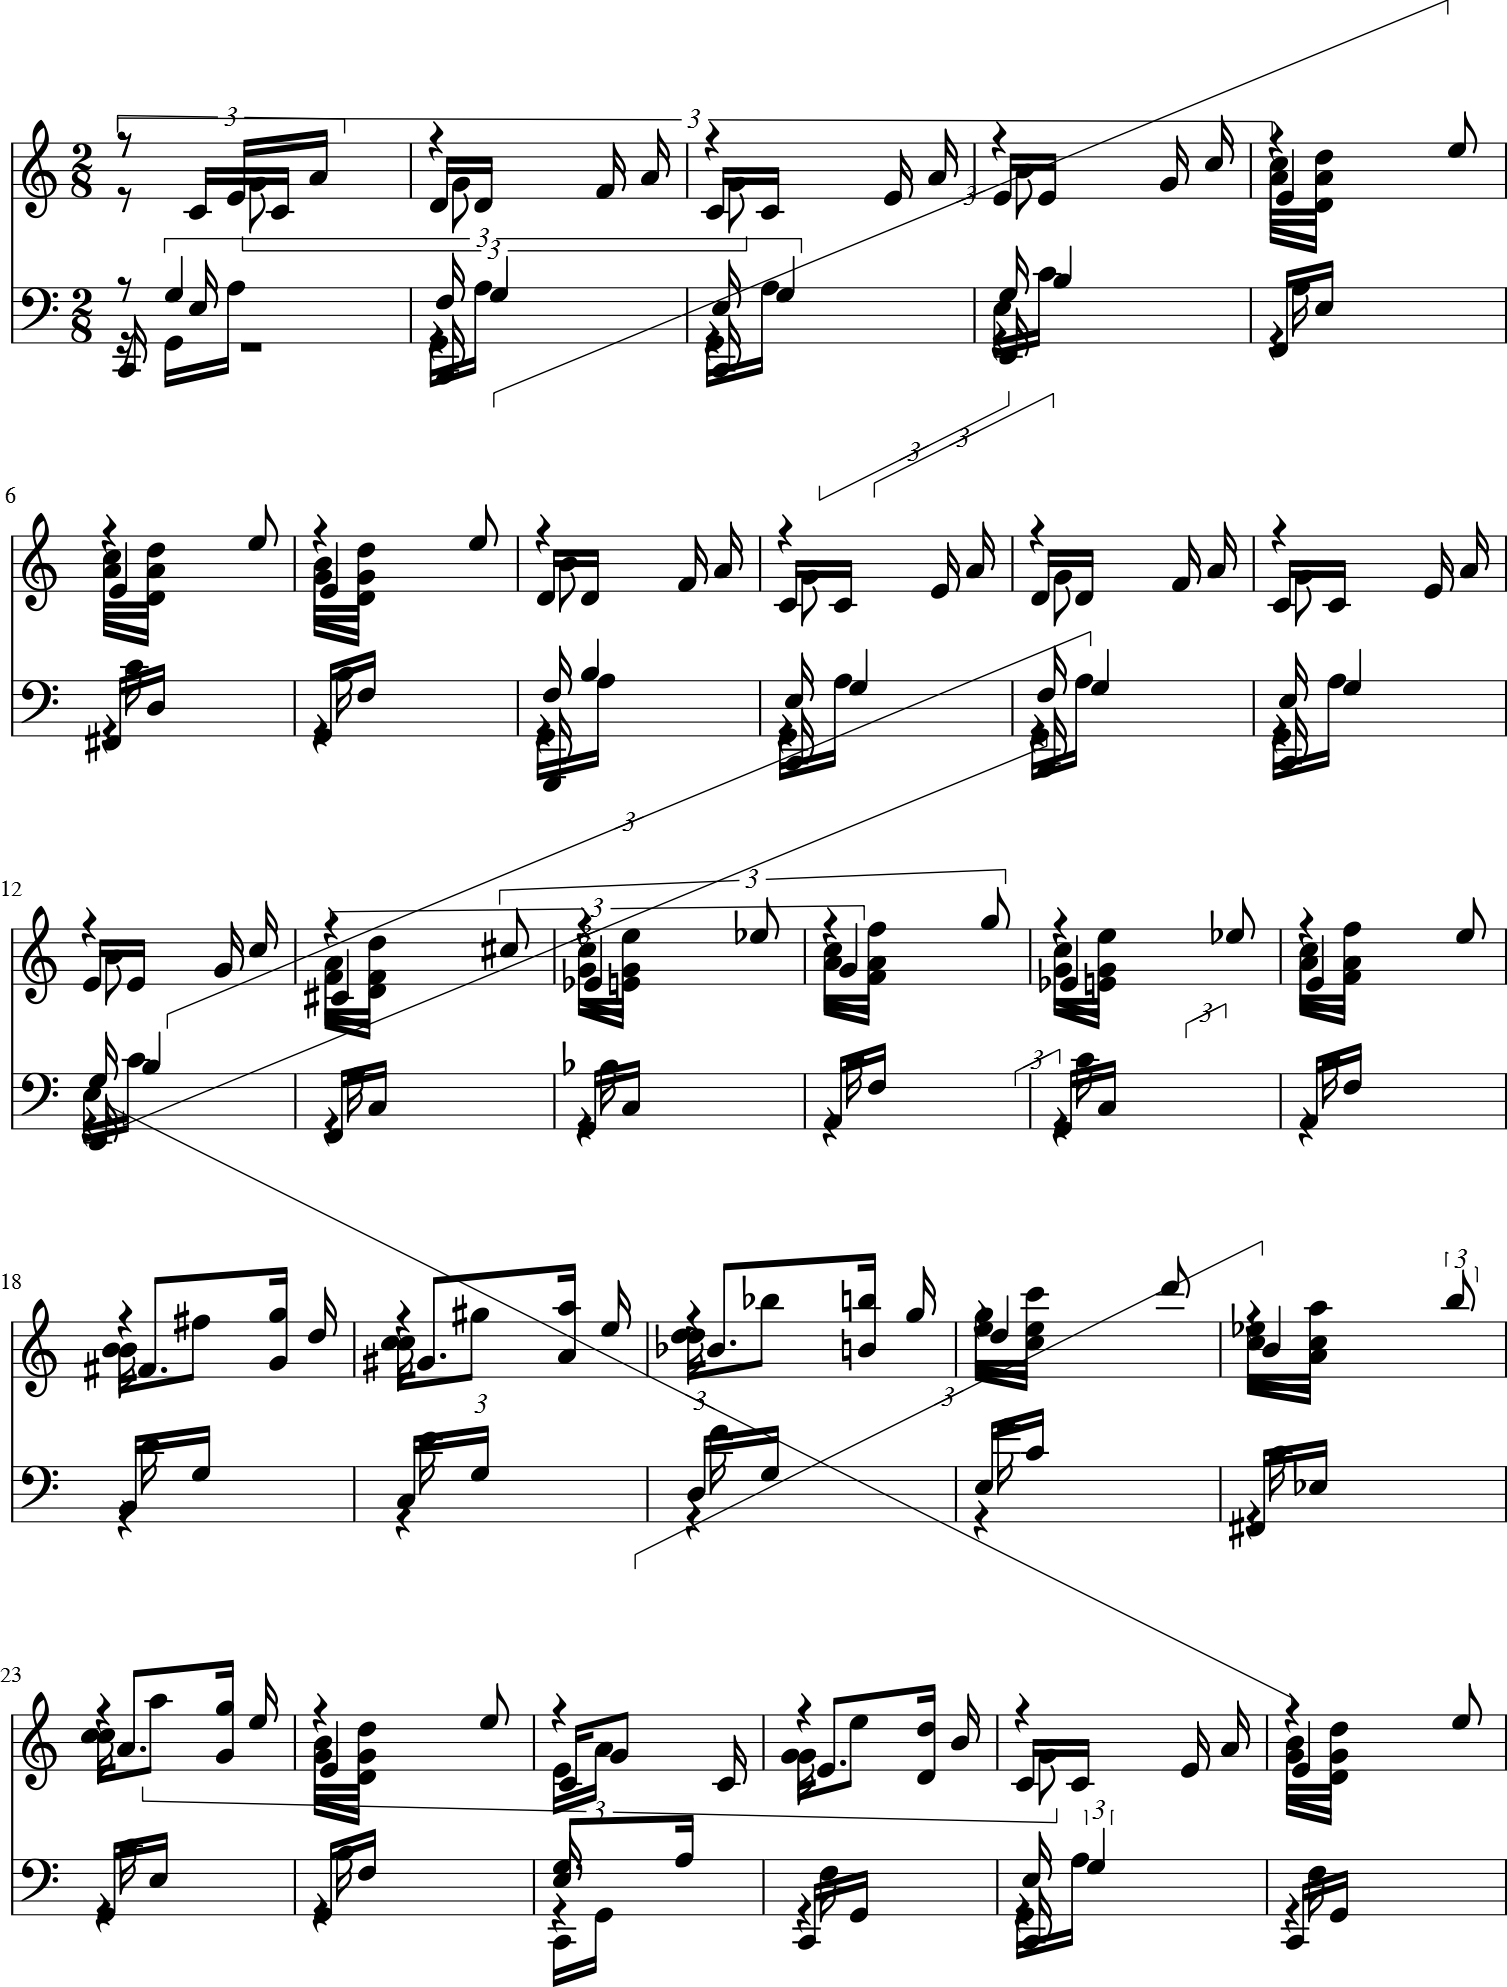

In [20]:
midi_stream.show()

In [21]:
midi_stream.show('midi')

In [22]:
midi_stream2 = converter.parse(arq_dest)

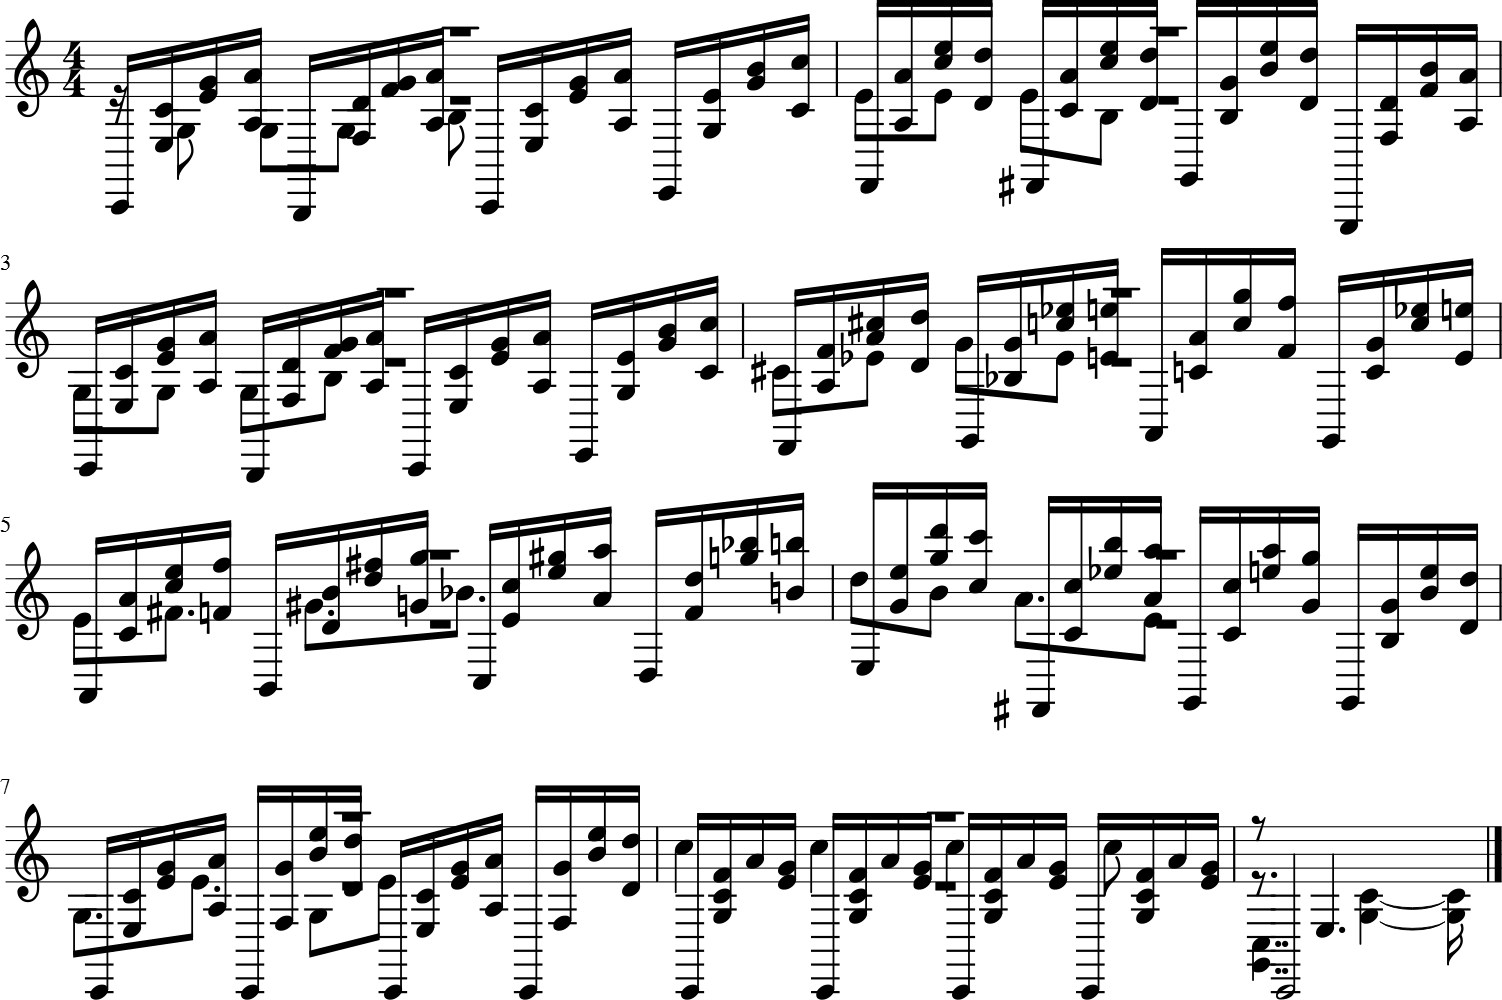

In [23]:
midi_stream2.show()

In [24]:
midi_stream2.show('midi')

In [26]:
midi_stream.show('text')

{0.0} <music21.stream.Part 0xbc71eb8>
    {0.0} <music21.instrument.Piano Piano>
    {0.0} <music21.tempo.MetronomeMark Quarter=69.0>
    {0.0} <music21.tempo.MetronomeMark Quarter=69.5>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 2/8>
    {0.0} <music21.stream.Voice 0xbb79f60>
        {0.0} <music21.note.Rest rest>
        {0.3333} <music21.note.Note C>
        {0.6667} <music21.note.Note C>
        {1.3333} <music21.note.Note D>
        {1.6667} <music21.note.Note D>
        {2.3333} <music21.note.Note C>
        {2.6667} <music21.note.Note C>
        {3.3333} <music21.note.Note E>
        {3.6667} <music21.note.Note E>
        {4.25} <music21.note.Note E>
        {5.25} <music21.note.Note E>
        {6.25} <music21.note.Note E>
        {7.3333} <music21.note.Note D>
        {7.6667} <music21.note.Note D>
        {8.3333} <music21.note.Note C>
        {8.6667} <music21.note.Note C>
        {9.3333} <music21.note.Note D>
        {9.6667} <music21.note

In [27]:
midi_stream2.show('text')

{0.0} <music21.stream.Part 0xc9b8240>
    {0.0} <music21.stream.Voice 0xc9b8470>
        {0.0} <music21.note.Note C>
        {0.25} <music21.chord.Chord E3 C4>
        {0.5} <music21.chord.Chord E4 G4>
        {0.75} <music21.chord.Chord A3 A4>
        {1.0} <music21.note.Note B>
        {1.25} <music21.chord.Chord F3 D4>
        {1.5} <music21.chord.Chord F4 G4>
        {1.75} <music21.chord.Chord A3 A4>
        {2.0} <music21.note.Note C>
        {2.25} <music21.chord.Chord E3 C4>
        {2.5} <music21.chord.Chord E4 G4>
        {2.75} <music21.chord.Chord A3 A4>
        {3.0} <music21.note.Note E>
        {3.25} <music21.chord.Chord G3 E4>
        {3.5} <music21.chord.Chord G4 B4>
        {3.75} <music21.chord.Chord C4 C5>
        {4.0} <music21.note.Note F>
        {4.25} <music21.chord.Chord A3 A4>
        {4.5} <music21.chord.Chord C5 E5>
        {4.75} <music21.chord.Chord D4 D5>
        {5.0} <music21.note.Note F#>
        {5.25} <music21.chord.Chord C4 A4>
        {5.5} <musi

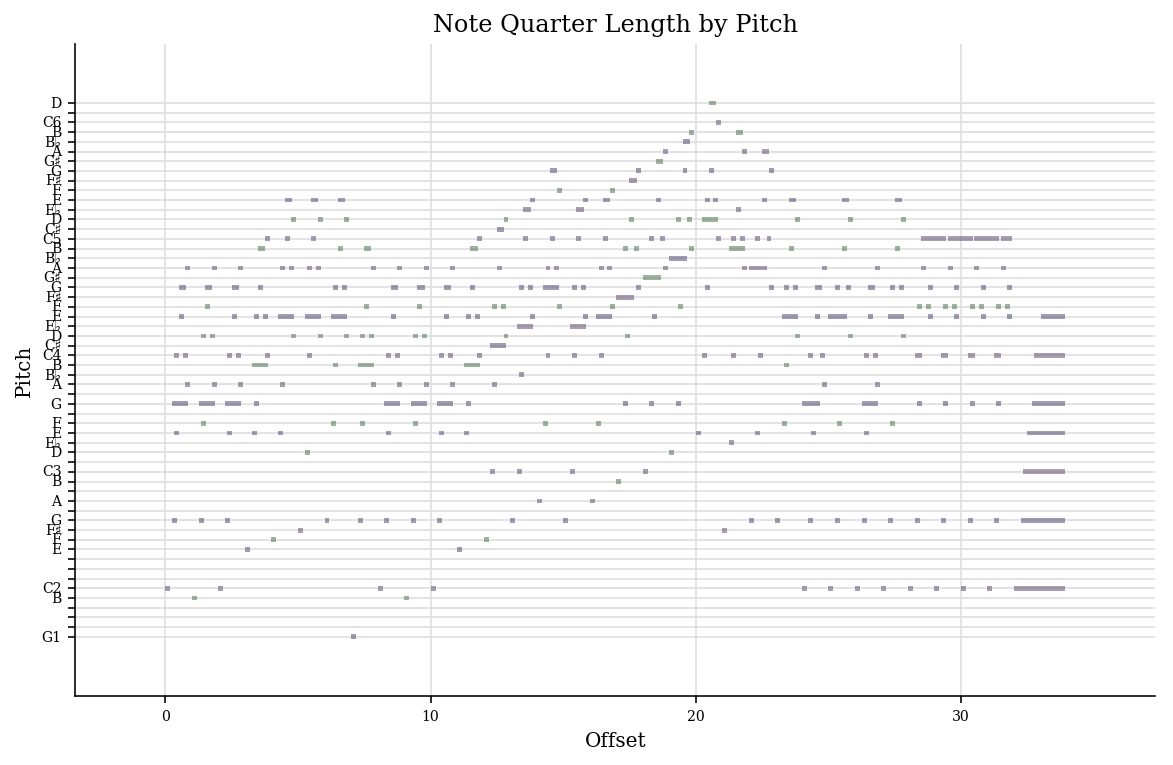

In [32]:
midi_stream.plot()

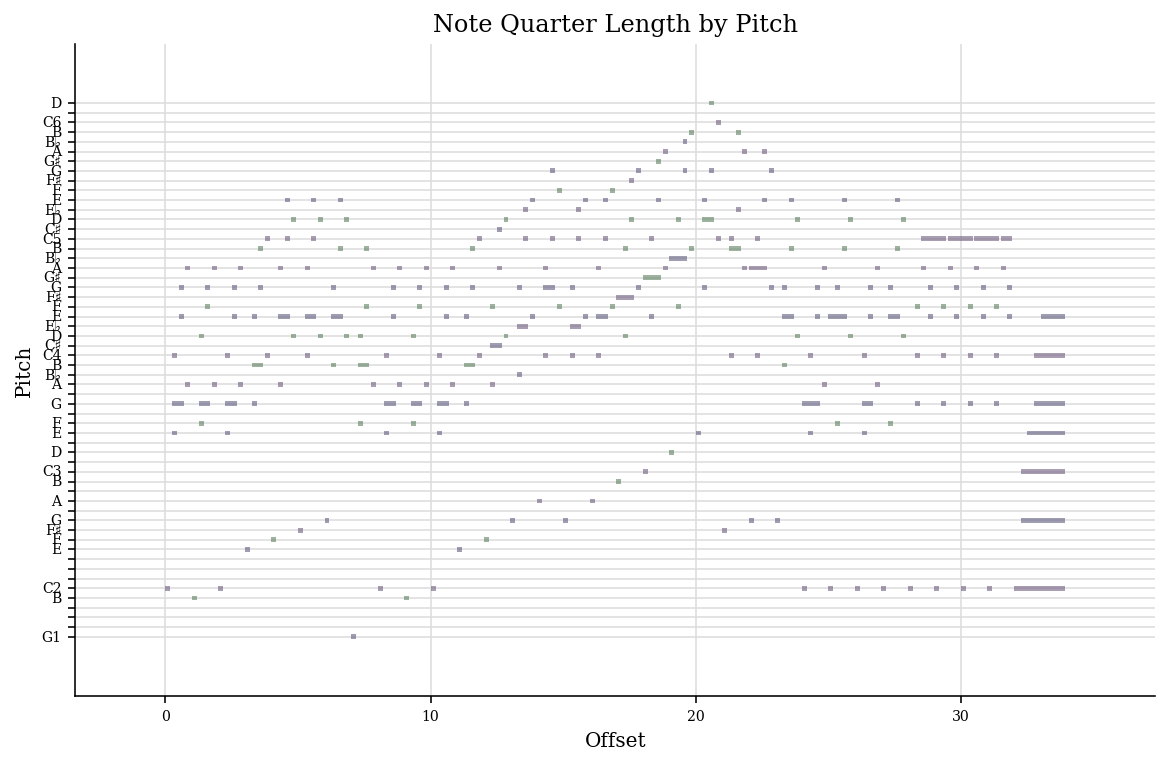

In [33]:
midi_stream2.plot()